# Loudoun County Growth Study

# Project Overview
Loudoun County Growth Study
Purpose: To analyze various economic, demographic, and housing characteristics.

### Import Libraries



In [25]:
# Import required libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import itertools
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set default Seaborn style
sns.set(style="whitegrid")

# Suppress all warnings
warnings.filterwarnings("ignore")

### Define File Paths

In [26]:
# Defining file paths for all datasets
file_paths = {
    "Income": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B19013.csv",
    "Housing_Costs": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_B25077.csv",
    "Labor_Stats": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_BLS_Data.csv",
    "Population_Characteristics": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_DP05.csv",
    "GDP": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/Combined_GDP_Data.csv",
    "Economic_Data": "C:/Users/AKKem/OneDrive/Desktop/Data Analysis Modules/Projects/Loudoun_Growth_Study/data/EC1700BASIC.csv"
}

### Load Data

In [27]:
# Function to load datasets
def load_datasets(file_paths):
    dataframes = {}
    for name, path in file_paths.items():
        try:
            # Changed encoding to 'utf-8-sig' to handle BOM and special characters
            df = pd.read_csv(path, encoding='utf-8-sig')
            dataframes[name] = df
        except Exception as e:
            print(f"Error loading {name}: {e}")
    return dataframes

# Load all datasets into a dictionary of DataFrames
dataframes = load_datasets(file_paths)

### Inspect Data

In [28]:
# Display columns of each DataFrame
for name, df in dataframes.items():
    print(f"Columns in {name}:")
    print(df.columns)
    print()

Columns in Income:
Index(['ÃYear', 'Santa_Clara_County_California', 'Montgomery_County_Maryland',
       'Wake_County_North_Carolina', 'Davidson_County_Tennessee',
       'Dallas_County_Texas', 'Fairfax_County_Virginia',
       'Loudoun_County_Virginia'],
      dtype='object')

Columns in Housing_Costs:
Index(['ÃYear', 'County', 'Median_Value_dollars'], dtype='object')

Columns in Labor_Stats:
Index(['area_fips', 'own_code', 'Industry_Code', 'agglvl_code', 'year', 'qtr',
       'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages',
       'avg_annual_pay'],
      dtype='object')

Columns in Population_Characteristics:
Index(['ÃYear', 'Label', 'Santa_Clara_County_California',
       'Montgomery_County_Maryland', 'Wake_County_North_Carolina',
       'Davidson_County_Tennessee', 'Dallas_County_Texas',
       'Fairfax_County_Virginia', 'Loudoun_County_Virginia'],
      dtype='object')

Columns in GDP:
Index(['FIPS_Code', 'County_Name', 'Year',
       'Chaintype_quantity_indexes_fo

### Data Cleaning
- Define Cleaning Function
- Apply Cleaning to All DataFrames

In [29]:
# Function to clean column names and dataset values with .loc assignments
def clean_dataset(df):
    # Clean column names
    df.columns = (
        df.columns.str.strip()
        .str.replace(r"^\_*", "", regex=True)  # Remove leading underscores
        .str.replace(r"\_*$", "", regex=True)  # Remove trailing underscores
        .str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters
        .str.replace(r"\s+", "_", regex=True)  # Replace spaces with underscores
        .str.replace(r"!", "", regex=True)  # Remove exclamation marks
        .str.replace(r"Â", "", regex=True)  # Remove 'Â'
    )
    
    # Clean individual data values
    df = df.applymap(
        lambda x: x.replace("!", "").replace("Â", "") if isinstance(x, str) else x
    )
    
    return df

# Apply the clean_dataset function to all DataFrames
cleaned_dataframes = {name: clean_dataset(df) for name, df in dataframes.items()}

### Saved Cleaned Data

In [30]:
#Save Cleaned Data
cleaned_dir = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data_cleaned"
os.makedirs(cleaned_dir, exist_ok=True)

# Save cleaned DataFrames
cleaned_file_paths = {}
for name, df in dataframes.items():
    cleaned_path = os.path.join(cleaned_dir, os.path.basename(file_paths[name]))
    df.to_csv(cleaned_path, index=False, encoding="utf-8")
    cleaned_file_paths[name] = cleaned_path

### Reload Cleaned Data

In [31]:
# Reload cleaned datasets
cleaned_dataframes = {}
for name, path in cleaned_file_paths.items():
    try:
        df = pd.read_csv(path, encoding='utf-8-sig')
        cleaned_dataframes[name] = df
    except Exception as e:
        print(f"Error loading cleaned data for {name}: {e}")

# Part 1: Loudoun County Analysis


### GDP Analysis

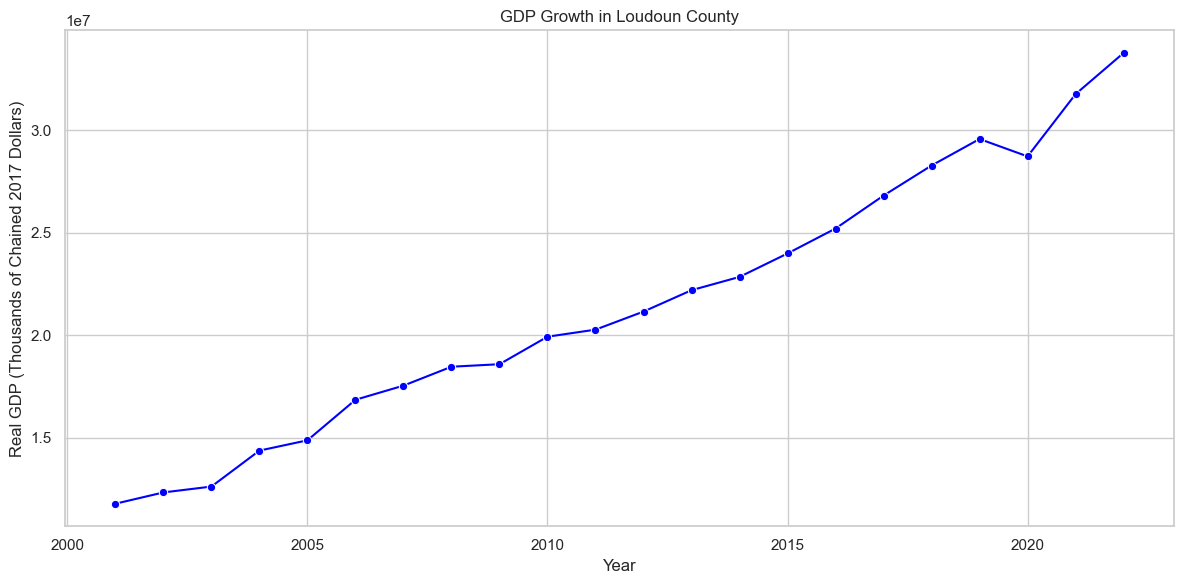

In [32]:
# Use cleaned GDP data
gdp_data = cleaned_dataframes["GDP"]

# Clean column names
gdp_data.columns = gdp_data.columns.str.strip()

# Rename columns if necessary
if "Real_GDP_thousands_of_chained_2017_dollars" in gdp_data.columns:
    gdp_data = gdp_data.rename(columns={"Real_GDP_thousands_of_chained_2017_dollars": "Real_GDP"})

# Filter for Loudoun County
loudoun_gdp = gdp_data[gdp_data["County_Name"] == "Loudoun, VA"].copy()

# Ensure the Real_GDP column is numeric
loudoun_gdp["Real_GDP"] = pd.to_numeric(loudoun_gdp["Real_GDP"], errors="coerce")

# Summarize GDP growth by year
gdp_growth = loudoun_gdp[["Year", "Real_GDP"]].sort_values("Year")

# Plot GDP growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_growth, x="Year", y="Real_GDP", marker='o', color='blue')
plt.title("GDP Growth in Loudoun County")
plt.xlabel("Year")
plt.ylabel("Real GDP (Thousands of Chained 2017 Dollars)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Employment by Industry 

<Figure size 1400x800 with 0 Axes>

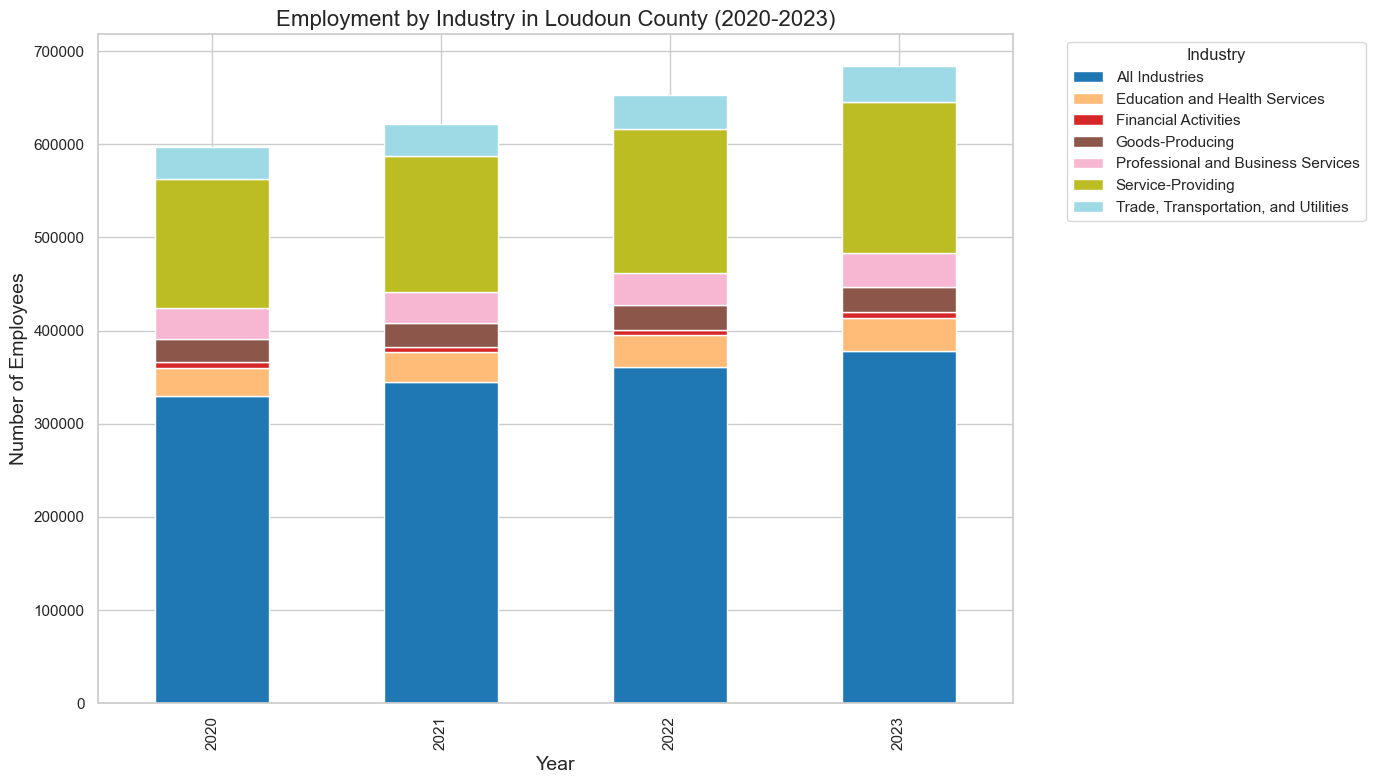

In [33]:
# Employment by Industry in Loudoun County (2020-2023)
labor_stats_df = cleaned_dataframes["Labor_Stats"]

# Load Data
loudoun_bls_data = cleaned_dataframes["Labor_Stats"]

# Define the mapping for Industry_Code to Industry_Name
industry_mapping = {
    "10": "All Industries",
    "101": "Goods-Producing",
    "102": "Service-Providing",
    "1011": "Natural Resources and Mining",
    "1012": "Construction",
    "1013": "Manufacturing",
    "1021": "Trade, Transportation, and Utilities",
    "1022": "Information",
    "1023": "Financial Activities",
    "1024": "Professional and Business Services",
    "1025": "Education and Health Services",
    "1026": "Leisure and Hospitality",
    "1027": "Other Services",
    "1028": "Public Administration",
}

# Map Industry_Code to Industry_Name
labor_stats_df["Industry_Name"] = labor_stats_df["Industry_Code"].astype(str).map(industry_mapping)

# Filter for Loudoun County (FIPS: 51107)
loudoun_fips = "51107"
loudoun_bls_data = labor_stats_df[labor_stats_df["area_fips"] == int(loudoun_fips)].copy()

# Convert annual_avg_emplvl to numeric
loudoun_bls_data["annual_avg_emplvl"] = pd.to_numeric(loudoun_bls_data["annual_avg_emplvl"], errors="coerce")

# Drop rows with missing Industry_Name or employment levels
loudoun_bls_data = loudoun_bls_data.dropna(subset=["Industry_Name", "annual_avg_emplvl"])

# Group by year and industry name, and sum employment levels
employment_by_year = (
    loudoun_bls_data.groupby(["year", "Industry_Name"])["annual_avg_emplvl"]
    .sum()
    .reset_index()
    .rename(columns={"annual_avg_emplvl": "Employment_Count"})
)

# Pivot data for plotting
employment_pivot = employment_by_year.pivot(index="year", columns="Industry_Name", values="Employment_Count").fillna(0)

# Generate a colormap with distinct colors for each industry using the updated matplotlib colormap access
colors = plt.colormaps['tab20'](np.linspace(0, 1, len(employment_pivot.columns)))

# Plot the stacked bar chart with updated colors
plt.figure(figsize=(14, 8))
employment_pivot.plot(kind="bar", stacked=True, figsize=(14, 8), color=colors)
plt.title("Employment by Industry in Loudoun County (2020-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Median Housing Costs Over Time

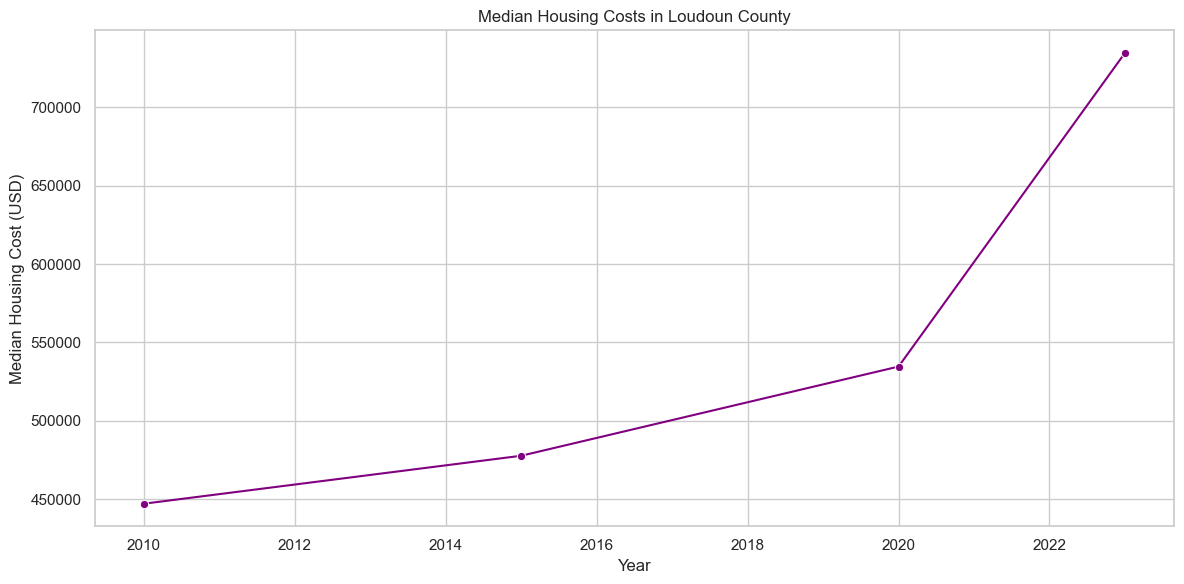

In [34]:
# Housing Costs Visualization
housing_costs = cleaned_dataframes["Housing_Costs"]
housing_costs.columns = housing_costs.columns.str.strip().str.replace("Ã", "").str.replace(" ", "_")
loudoun_housing_costs = housing_costs[housing_costs["County"] == "Loudoun County, Virginia"]

# Use .loc to modify the DataFrame and avoid SettingWithCopyWarning
loudoun_housing_costs.loc[:, "Median_Value_dollars"] = pd.to_numeric(
    loudoun_housing_costs["Median_Value_dollars"].replace({',': ''}, regex=True),
    errors="coerce"
)

loudoun_housing_costs.loc[:, "Year"] = pd.to_numeric(
    loudoun_housing_costs["Year"], errors="coerce"
)

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=loudoun_housing_costs, x="Year", y="Median_Value_dollars", marker='o', color='purple')
plt.title("Median Housing Costs in Loudoun County")
plt.xlabel("Year")
plt.ylabel("Median Housing Cost (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Population Growth



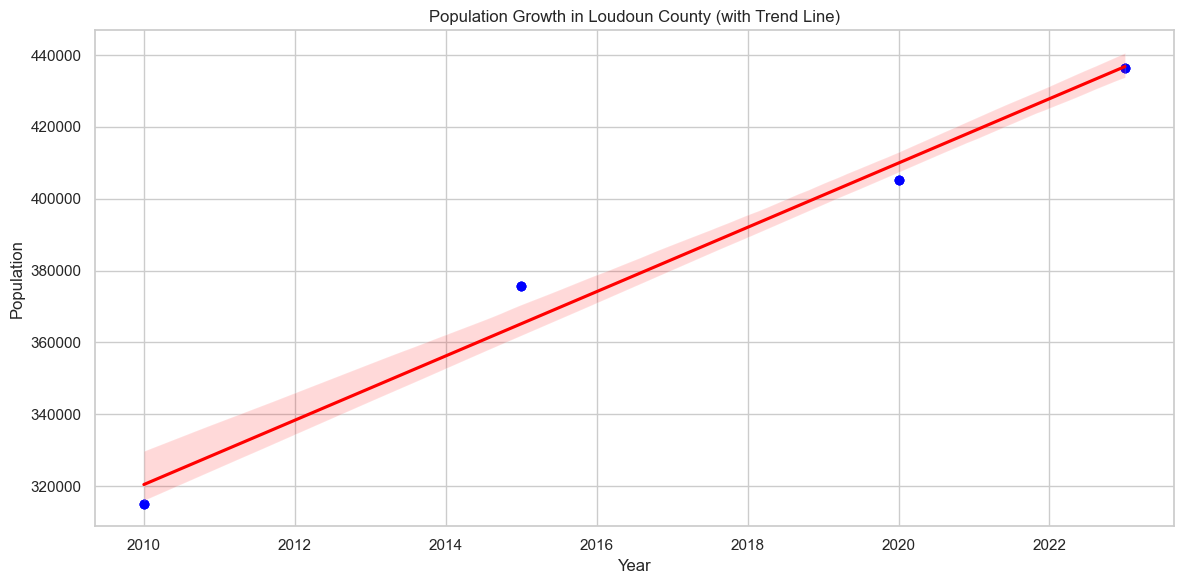

In [35]:
# Use cleaned Population Characteristics data
population_characteristics = cleaned_dataframes["Population_Characteristics"]

# Clean column names
population_characteristics.columns = population_characteristics.columns.str.strip().str.replace("Ã", "").str.replace(" ", "_")#
population_characteristics = cleaned_dataframes["Population_Characteristics"]

# Filter for "Total population"
population_growth = population_characteristics[population_characteristics["Label"] == "Total population"]

# Extract necessary columns
population_growth = population_growth[["Year", "Loudoun_County_Virginia"]].copy()

# Rename columns for clarity
population_growth = population_growth.rename(columns={"Loudoun_County_Virginia": "Population"})

# Use .loc to modify the DataFrame and avoid SettingWithCopyWarning
population_growth.loc[:, "Population"] = pd.to_numeric(
    population_growth["Population"].str.replace(",", "", regex=True), errors="coerce"
)

# Explicitly cast 'Year' and 'Population' to their respective numeric types
population_growth["Year"] = population_growth["Year"].astype(int)
population_growth["Population"] = population_growth["Population"].astype(float)

# Confirm data types after casting
data_types_after_cast = population_growth.dtypes

# Attempt the plot again with explicitly cast columns
plt.figure(figsize=(12, 6))
sns.regplot(x=population_growth["Year"], y=population_growth["Population"], 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Population Growth in Loudoun County (with Trend Line)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()

### Number of Businesses

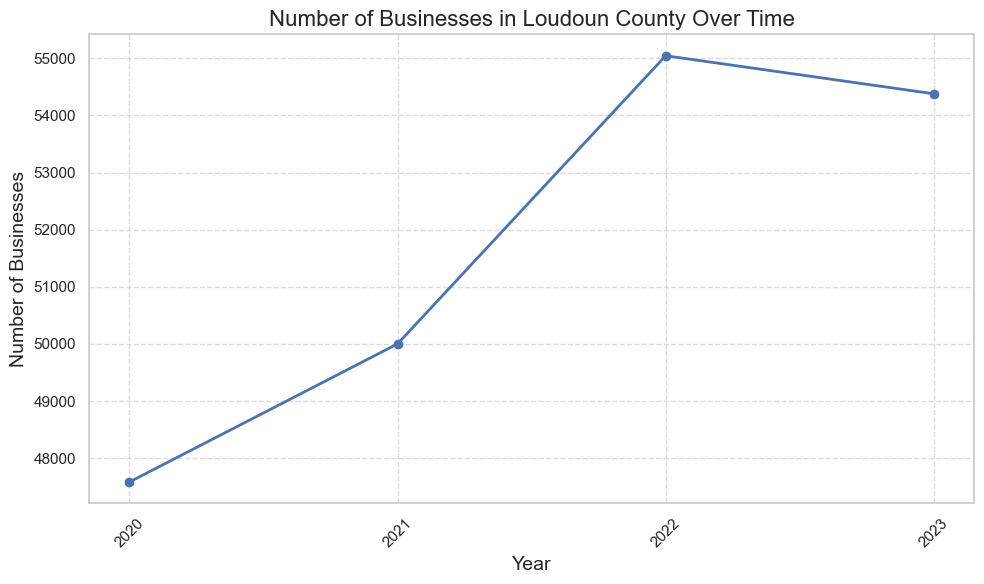

In [36]:
## Number of Businesses in Loudoun County Over Time
# Group data to calculate the number of businesses (annual_avg_estabs)
business_trend = (
    loudoun_bls_data.groupby("year")["annual_avg_estabs"]
    .sum()
    .reset_index()
    .rename(columns={"annual_avg_estabs": "Number_of_Businesses"})
)

# Plot the trend of businesses over time
plt.figure(figsize=(10, 6))
plt.plot(business_trend["year"], business_trend["Number_of_Businesses"], marker="o", linestyle="-", linewidth=2)
plt.title("Number of Businesses in Loudoun County Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Businesses", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Set x-ticks to only display integer years (avoid non-integer values like 2020.5)
plt.xticks(ticks=business_trend["year"].unique(), rotation=45)

plt.tight_layout()
plt.show()

#### Print Data Types

In [37]:
# Load the dataset
combined_bls_data = cleaned_dataframes["Labor_Stats"]
combined_bls_data.head()
# Display the data types of all columns in the DataFrame
print(combined_bls_data.dtypes)

area_fips              int64
own_code               int64
Industry_Code          int64
agglvl_code            int64
year                   int64
qtr                   object
annual_avg_estabs      int64
annual_avg_emplvl      int64
total_annual_wages    object
avg_annual_pay        object
Industry_Name         object
dtype: object


### Cost of Labor in Loudoun County Over Time

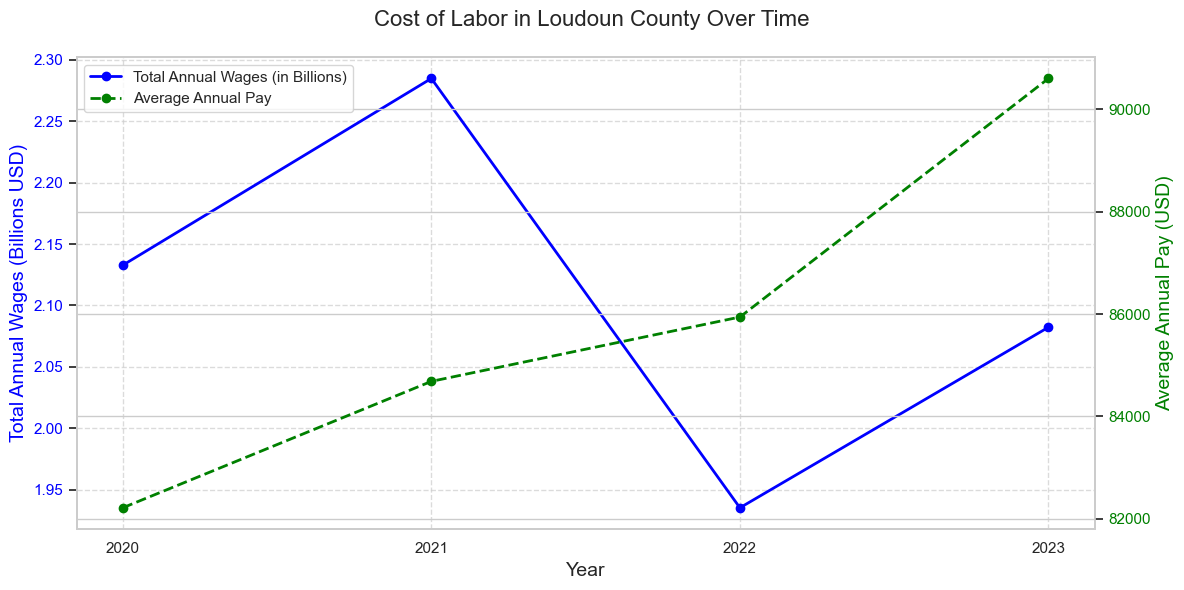

In [38]:
# Load the dataset
combined_bls_data = cleaned_dataframes["Labor_Stats"]

# Ensure that the total_annual_wages and avg_annual_pay columns are strings
combined_bls_data["total_annual_wages"] = combined_bls_data["total_annual_wages"].astype(str)
combined_bls_data["avg_annual_pay"] = combined_bls_data["avg_annual_pay"].astype(str)

# Clean the total_annual_wages and avg_annual_pay columns
combined_bls_data["total_annual_wages"] = pd.to_numeric(
    combined_bls_data["total_annual_wages"].str.replace(",", "", regex=True), errors="coerce"
)
combined_bls_data["avg_annual_pay"] = pd.to_numeric(
    combined_bls_data["avg_annual_pay"].str.replace(",", "", regex=True).str.replace("$", "", regex=True), errors="coerce"
)

# Filter the dataset for Loudoun County (area_fips = 51107)
loudoun_fips = 51107
loudoun_bls_data = combined_bls_data[combined_bls_data["area_fips"] == loudoun_fips]

# Handle missing or invalid data
loudoun_bls_data = loudoun_bls_data.dropna(subset=["total_annual_wages", "avg_annual_pay"])
loudoun_bls_data = loudoun_bls_data[(
    loudoun_bls_data["total_annual_wages"] > 0) & (loudoun_bls_data["avg_annual_pay"] > 0)
]

# Aggregate data by year to calculate trends for total wages and average pay
labor_cost_trend = (
    loudoun_bls_data.groupby("year")[["total_annual_wages", "avg_annual_pay"]]
    .mean(numeric_only=True)
    .reset_index()
    .rename(columns={"total_annual_wages": "Total Annual Wages", "avg_annual_pay": "Average Annual Pay"})
)

# Plot cost of labor trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total annual wages on primary y-axis
ax1.plot(
    labor_cost_trend["year"],
    labor_cost_trend["Total Annual Wages"] / 1e9,  # Convert to billions
    marker="o",
    linestyle="-",
    linewidth=2,
    color="blue",
    label="Total Annual Wages (in Billions)",
)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Total Annual Wages (Billions USD)", fontsize=14, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, linestyle="--", alpha=0.7)

# Create a secondary y-axis for average annual pay
ax2 = ax1.twinx()
ax2.plot(
    labor_cost_trend["year"],
    labor_cost_trend["Average Annual Pay"],
    marker="o",
    linestyle="--",
    color="green",
    linewidth=2,
    label="Average Annual Pay",
)
ax2.set_ylabel("Average Annual Pay (USD)", fontsize=14, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add a legend to clarify both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Add title and adjust layout
fig.suptitle("Cost of Labor in Loudoun County Over Time", fontsize=16)
fig.tight_layout()

# Set x-ticks to only display integer years (avoid non-integer values like 2020.5)
plt.xticks(ticks=labor_cost_trend["year"].unique(), rotation=45)

plt.show()

### Median Household Income in Loudoun County Over Time 

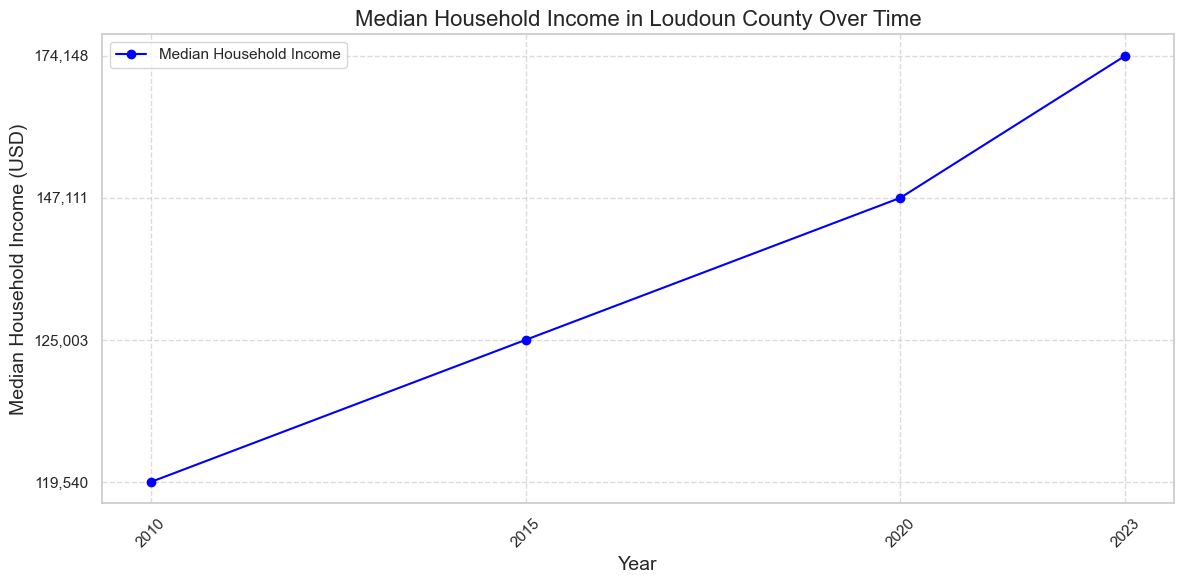

In [39]:
# Load the dataset (replace with your file path or cleaned DataFrame)
income_data = cleaned_dataframes["Income"]

# Clean column names
income_data.columns = (
    income_data.columns.str.strip()
    .str.replace("Ã", "", regex=False)
    .str.replace(" ", "_", regex=False)
)

# Ensure 'Year' and 'Loudoun_County_Virginia' columns exist
if "Year" in income_data.columns and "Loudoun_County_Virginia" in income_data.columns:
    # Select relevant columns for Loudoun County
    loudoun_income = income_data[["Year", "Loudoun_County_Virginia"]].copy()
    loudoun_income.columns = ["Year", "Median Income"]  # Rename columns for clarity

    # Drop rows with missing values
    loudoun_income = loudoun_income.dropna()

    # Sort by year
    loudoun_income = loudoun_income.sort_values(by="Year")

    # Plot Median Income Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(
        loudoun_income["Year"],
        loudoun_income["Median Income"],
        marker="o",
        linestyle="-",
        color="blue",
        label="Median Household Income",
    )
    plt.title("Median Household Income in Loudoun County Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Median Household Income (USD)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(loudoun_income["Year"], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for Year or Loudoun County are missing.")

# Part 2: Comparison of Key Economic Characteristics of Loudoun County with Peer Counties

### Median Household Income by County

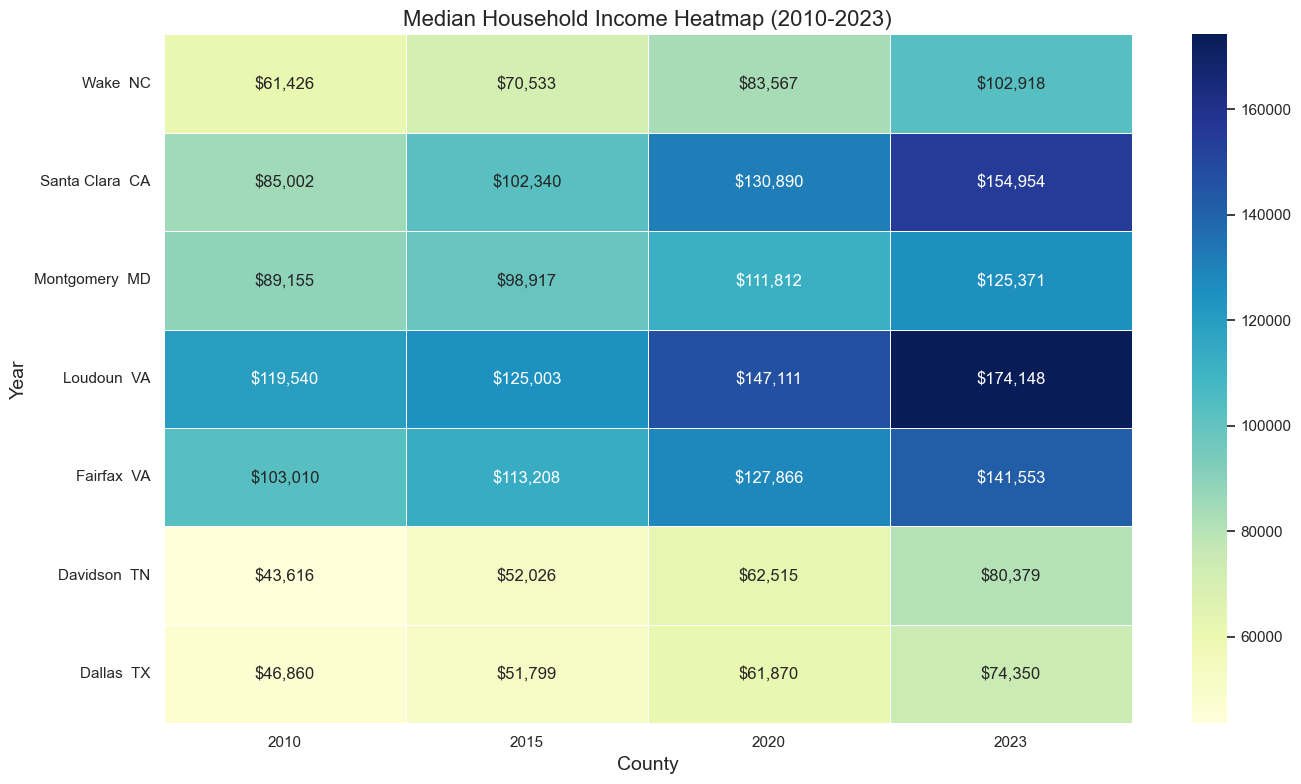

In [40]:
# Define the counties of interest
counties_of_interest = [
    "Loudoun_County_Virginia",
    "Fairfax_County_Virginia",
    "Montgomery_County_Maryland",
    "Santa_Clara_County_California",
    "Dallas_County_Texas",
    "Davidson_County_Tennessee",
    "Wake_County_North_Carolina"
]

# Select and reshape data
income_data = cleaned_dataframes["Income"]
income_data.columns = income_data.columns.str.strip().str.replace("Ã", "", regex=False).str.replace(" ", "_")
selected_data = income_data[["Year"] + counties_of_interest]
income_long = selected_data.melt(id_vars="Year", var_name="County", value_name="Median Household Income")
income_long["County"] = income_long["County"].str.replace("_", " ").str.replace("County", "").str.replace("Virginia", "VA").str.replace("Maryland", "MD").str.replace("California", "CA").str.replace("Texas", "TX").str.replace("Tennessee", "TN").str.replace("North Carolina", "NC")

# Clean the 'Median Household Income' column by removing commas and converting to numeric
income_long["Median Household Income"] = income_long["Median Household Income"].str.replace(",", "").astype(float)

# Pivot the data
income_pivot = income_long.pivot(index="County", columns="Year", values="Median Household Income")

# Reverse the order of the rows in the pivoted data to have 2023 on top and 2010 on the bottom
income_pivot = income_pivot[::-1]

# Plotting the heatmap with currency formatting
plt.figure(figsize=(14, 8))
ax = sns.heatmap(income_pivot, annot=True, fmt=",.0f", cmap="YlGnBu", linewidths=0.5)

# Format the annotations as currency
for text in ax.texts:
    # Remove commas from the annotation text before formatting as currency
    value = text.get_text().replace(",", "")
    text.set_text('${:,.0f}'.format(float(value)))

# Title and labels
plt.title("Median Household Income Heatmap (2010-2023)", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()

### Employment Trends by County

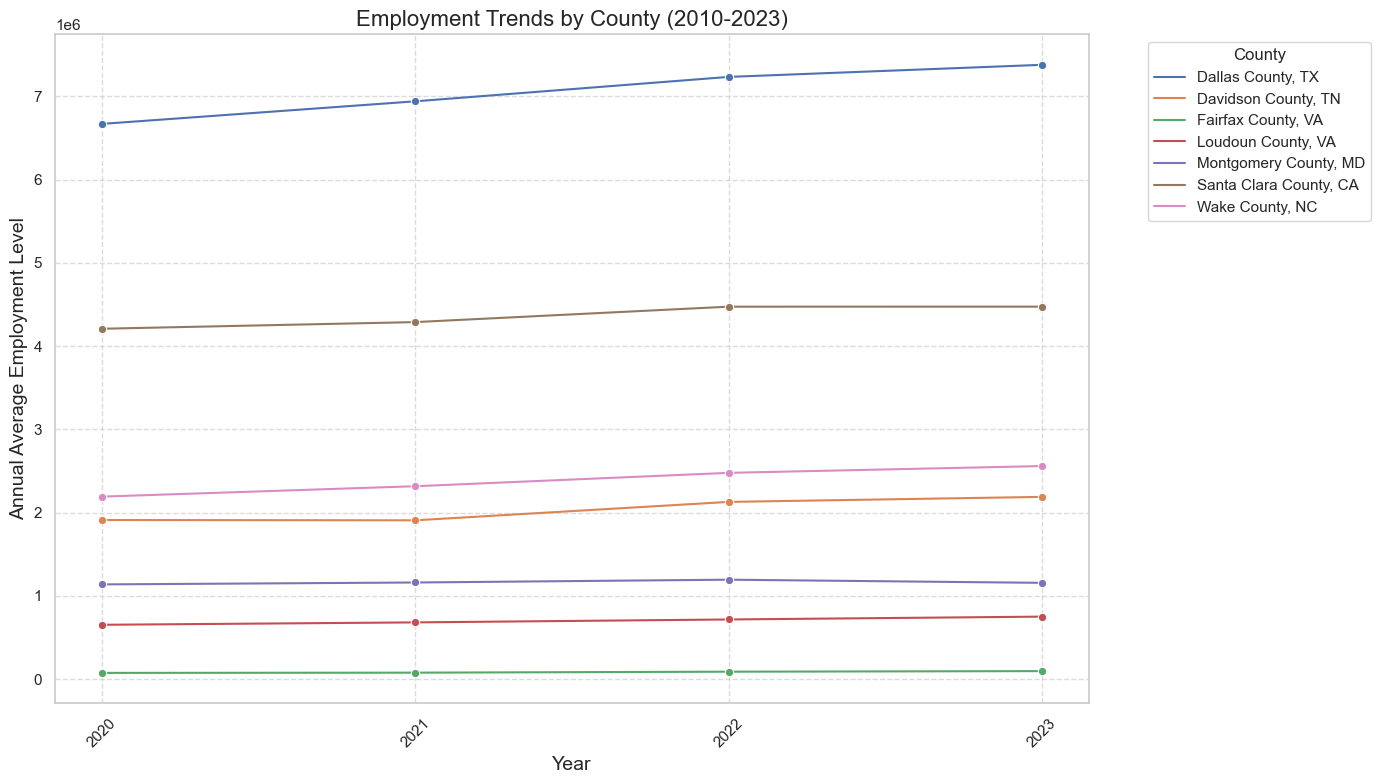

In [41]:
# Load and reshape employment data
employment_data = cleaned_dataframes["Labor_Stats"]
employment_data["area_fips"] = employment_data["area_fips"].astype(str)
selected_fips = {
    "51107": "Loudoun County, VA",
    "51600": "Fairfax County, VA",
    "24033": "Montgomery County, MD",
    "6085": "Santa Clara County, CA",
    "48113": "Dallas County, TX",
    "47037": "Davidson County, TN",
    "37183": "Wake County, NC"
}
employment_data = employment_data[employment_data["area_fips"].isin(selected_fips.keys())]
employment_data["County"] = employment_data["area_fips"].map(selected_fips)

# Aggregate and plot employment trends
employment_trends = employment_data.groupby(["year", "County"])["annual_avg_emplvl"].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=employment_trends, x="year", y="annual_avg_emplvl", hue="County", marker="o")
plt.title("Employment Trends by County (2010-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Average Employment Level", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Set x-ticks to only display integer years (avoid non-integer values like 2020.5)
plt.xticks(ticks=employment_trends["year"].unique(), rotation=45)
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### GDP Trends by County

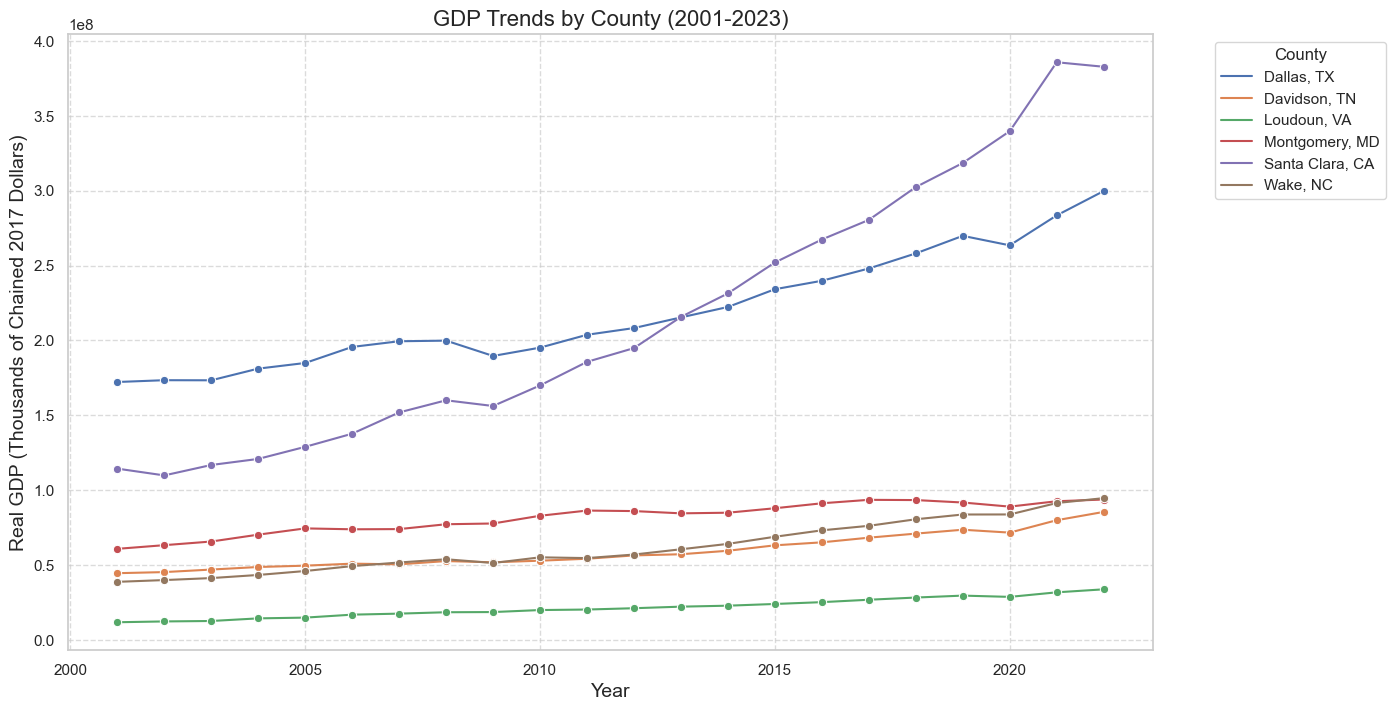

In [42]:
# Define the counties of interest
counties_of_interest = [
    "Loudoun, VA",
    "Fairfax, VA",
    "Montgomery, MD",
    "Santa Clara, CA",
    "Dallas, TX",
    "Davidson, TN",
    "Wake, NC"
]

# Filter data for the counties of interest
filtered_gdp_data = gdp_data[gdp_data["County_Name"].isin(counties_of_interest)]

# Check for missing values in the key columns and drop them
filtered_gdp_data = filtered_gdp_data.dropna(subset=["Year", "Real_GDP"])

# Ensure Year is numeric for sorting
filtered_gdp_data["Year"] = pd.to_numeric(filtered_gdp_data["Year"], errors="coerce")

# Prepare the data for plotting
filtered_gdp_data = filtered_gdp_data[["County_Name", "Year", "Real_GDP"]]

# Sort by Year for consistent plotting
filtered_gdp_data = filtered_gdp_data.sort_values(by=["County_Name", "Year"])

# Display cleaned data for verification
filtered_gdp_data.head()

# Plot GDP trends by county
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_gdp_data,
    x="Year",
    y="Real_GDP",
    hue="County_Name",
    marker="o"
)

# Customize the plot
plt.title("GDP Trends by County (2001-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Real GDP (Thousands of Chained 2017 Dollars)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="County", bbox_to_anchor=(1.05, 1))

### Median Housing Cost by County Over Time

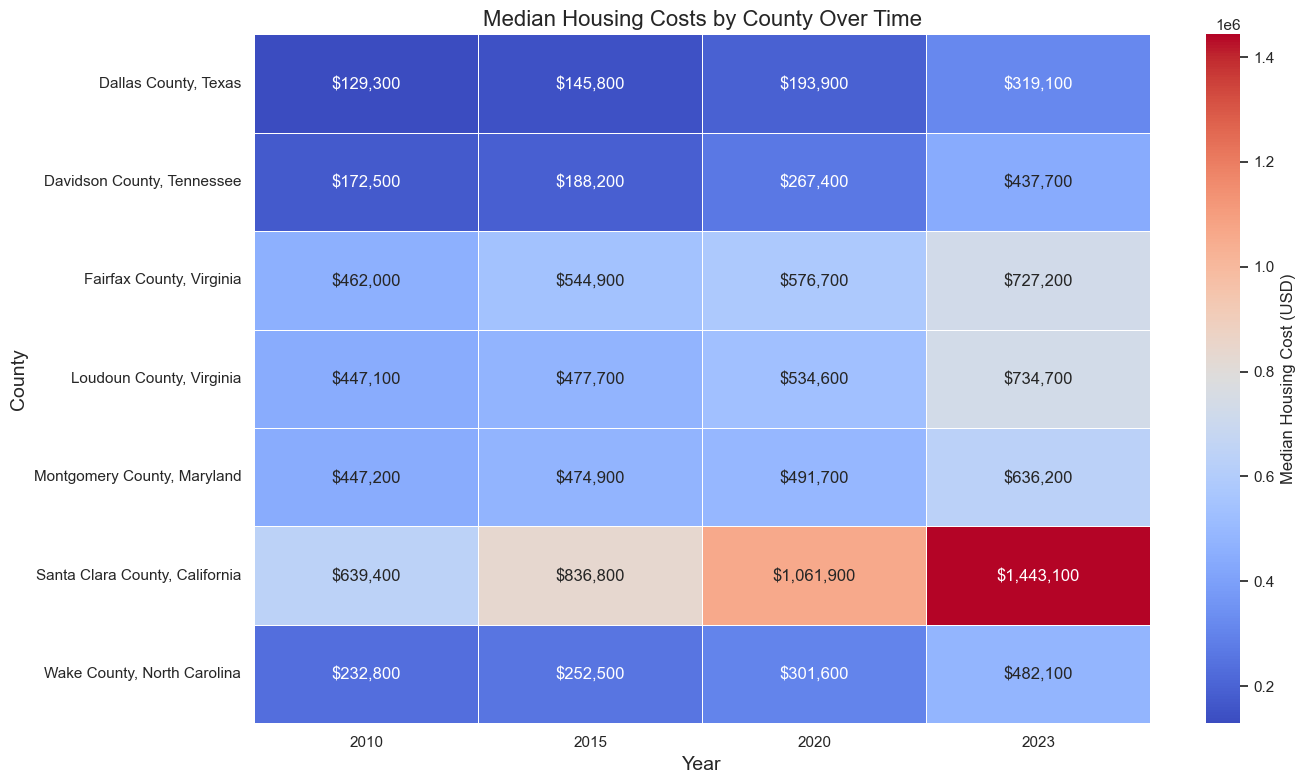

In [43]:
# Load the housing costs dataset
housing_costs = cleaned_dataframes["Housing_Costs"]

# Ensure proper column names
housing_costs.columns = housing_costs.columns.str.strip().str.replace("Ã", "").str.replace(" ", "_")

# Rename columns for consistency
housing_costs = housing_costs.rename(columns={"Median_Value_dollars": "Median_Housing_Cost", "County": "County_Name"})

# Convert Year and Median_Housing_Cost to numeric
housing_costs["Year"] = pd.to_numeric(housing_costs["Year"], errors="coerce")
housing_costs["Median_Housing_Cost"] = pd.to_numeric(
    housing_costs["Median_Housing_Cost"].str.replace(",", "", regex=True), errors="coerce"
)

# Filter only the counties of interest
counties_of_interest = [
    "Santa Clara County, California",
    "Montgomery County, Maryland",
    "Wake County, North Carolina",
    "Davidson County, Tennessee",
    "Dallas County, Texas",
    "Fairfax County, Virginia",
    "Loudoun County, Virginia"
]
housing_costs = housing_costs[housing_costs["County_Name"].isin(counties_of_interest)]

# Pivot the data for heatmap format (rows: counties, columns: years)
housing_costs_pivot = housing_costs.pivot(index="County_Name", columns="Year", values="Median_Housing_Cost")

# Create the heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    housing_costs_pivot,
    cmap="coolwarm",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={"label": "Median Housing Cost (USD)"}
)

# Format the annotations as currency
for text in ax.texts:
    value = text.get_text().replace(",", "")  # Remove commas from the text
    text.set_text('${:,.0f}'.format(float(value)))  # Format as currency

# Add titles and labels
plt.title("Median Housing Costs by County Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("County", fontsize=14)
plt.tight_layout()
plt.show()

#### Load Labor Data

In [44]:
# Load and reshape establishments data
labor_stats_data = cleaned_dataframes["Labor_Stats"]
labor_stats_data.head()

,area_fips,own_code,Industry_Code,agglvl_code,year,qtr,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,avg_annual_pay,Industry_Name
0,48113,0,10,70,2020,A,81171,1667356,1.250000e+11,75038.0,All Industries
1,48113,1,10,71,2020,A,167,26129,2.365181e+09,90520.0,All Industries
2,48113,1,101,72,2020,A,1,6,5.595650e+05,91983.0,Goods-Producing
3,48113,1,102,72,2020,A,166,26123,2.364622e+09,90520.0,Service-Providing
4,48113,1,1021,73,2020,A,69,8186,5.908075e+08,72169.0,"Trade, Transportation, and Utilities"


### Number of Establishments by County Over Time

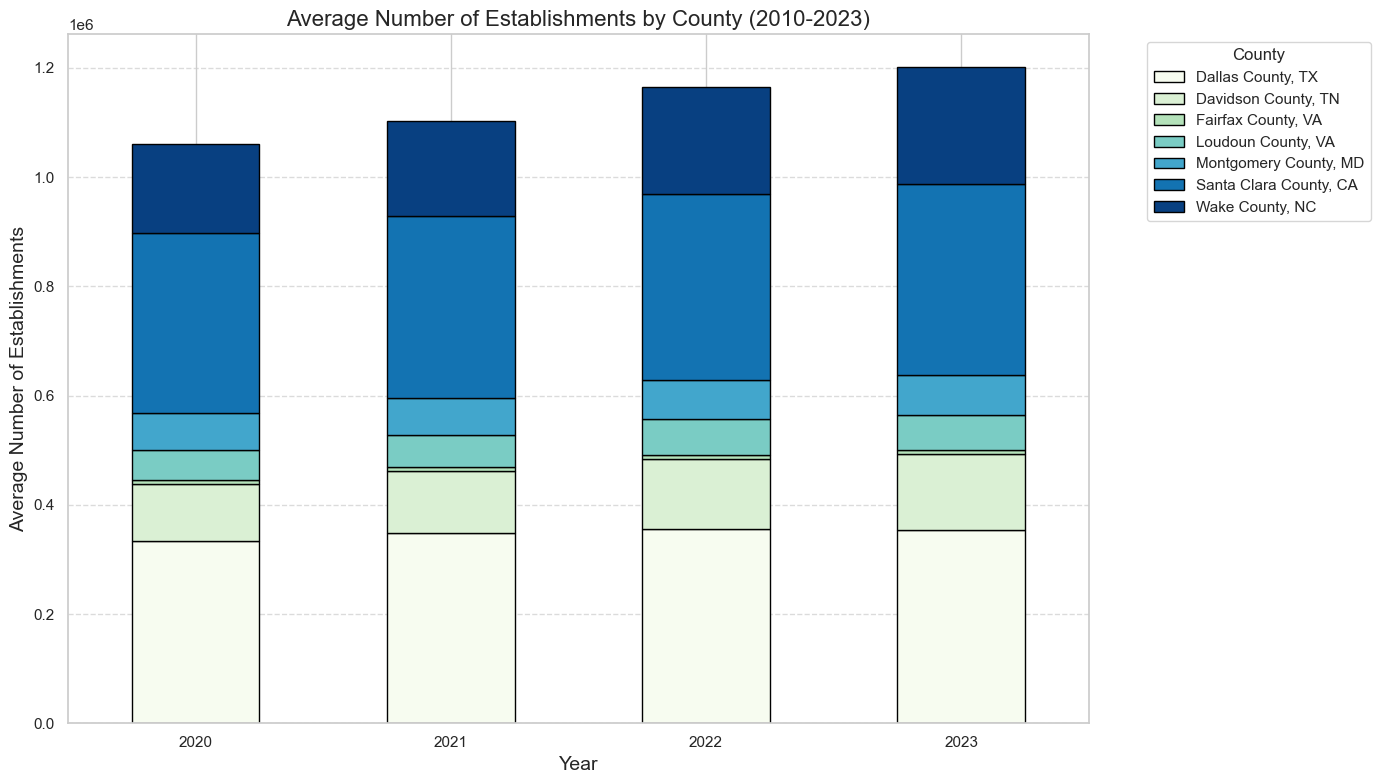

In [45]:
# Mapping FIPS codes to county names
selected_fips = {
    "48113": "Dallas County, TX",
    "47037": "Davidson County, TN",
    "51600": "Fairfax County, VA",
    "51107": "Loudoun County, VA",
    "24033": "Montgomery County, MD",
    "6085": "Santa Clara County, CA",
    "37183": "Wake County, NC",
}

# Ensure FIPS codes are mapped correctly to counties
labor_stats_data["County"] = labor_stats_data["area_fips"].astype(str).map(selected_fips)

# Refilter the data to include only selected counties
filtered_data = labor_stats_data[labor_stats_data["County"].notna()]

# Aggregate data by year and county for establishments
establishments_trends = (
    filtered_data.groupby(["year", "County"])["annual_avg_estabs"]
    .sum()
    .reset_index()
)

# Pivot data for stacked bar chart
establishments_pivot = establishments_trends.pivot(
    index="year", columns="County", values="annual_avg_estabs"
).fillna(0)

# Plot stacked bar chart
ax = establishments_pivot.plot(
    kind="bar", stacked=True, figsize=(14, 8), colormap="GnBu", edgecolor="black"
)

# Customize the plot
plt.title("Average Number of Establishments by County (2010-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Number of Establishments", fontsize=14)
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### Loudoun County GDP Predictions

Index(['FIPS_Code', 'County_Name', 'Year',
       'Chaintype_quantity_indexes_for_real_GDP',
       'Currentdollar_GDP_thousands_of_current_dollars', 'Description',
       'Real_GDP'],
      dtype='object')


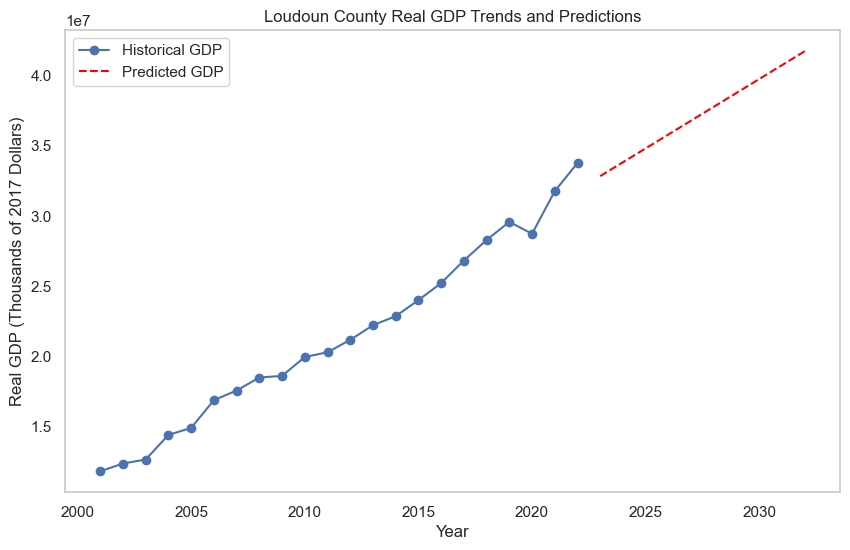

In [46]:
# Filter the dataset for Loudoun County
loudoun_gdp_data = gdp_data[gdp_data['County_Name'].str.contains("Loudoun", case=False, na=False)]

# Check if data is filtered correctly
if loudoun_gdp_data.empty:
    print("No data found for Loudoun County!")
else:
    # Check the column names to make sure the 'Real_GDP_thousands_of_chained_2017_dollars' column exists
    print(loudoun_gdp_data.columns)  # Check the available columns

    # Assuming the correct column name is 'Real_GDP'
    real_gdp = loudoun_gdp_data['Real_GDP'].values  # Replace 'Real_GDP_thousands_of_chained_2017_dollars' with the correct name

    # Prepare data for analysis
    years = loudoun_gdp_data['Year'].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(years, real_gdp)

    # Predict GDP for the next 10 years
    future_years = np.arange(years[-1][0] + 1, years[-1][0] + 11).reshape(-1, 1)
    future_gdp = model.predict(future_years)

    # Plot historical and predicted GDP
    plt.figure(figsize=(10, 6))
    plt.plot(loudoun_gdp_data['Year'], real_gdp, label='Historical GDP', marker='o')
    plt.plot(future_years, future_gdp, label='Predicted GDP', linestyle='--', color='red')
    plt.xlabel('Year')
    plt.ylabel('Real GDP (Thousands of 2017 Dollars)')
    plt.title('Loudoun County Real GDP Trends and Predictions')
    plt.legend()
    plt.grid()
    plt.show()

### Loudoun County Household Income Predictions

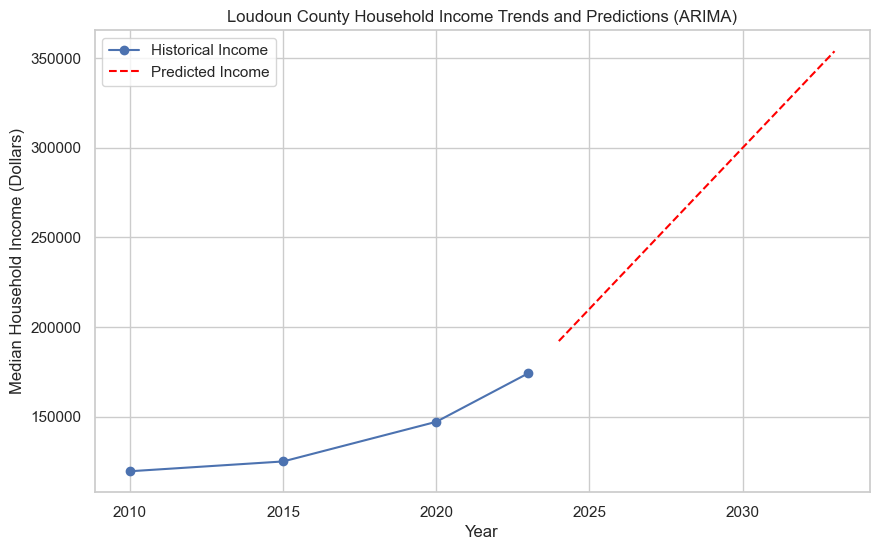

In [47]:
# Ensure all the necessary data is in the correct format and the model is fit properly

# Clean the column names and the data
income_data.columns = income_data.columns.str.strip().str.replace("Ã", "A")

# Extract Loudoun County data and prepare for ARIMA
loudoun_income_data_cleaned = income_data[['Year', 'Loudoun_County_Virginia']].rename(columns={'Year': 'Year', 'Loudoun_County_Virginia': 'Income'})

# Convert Year and Income to numeric
loudoun_income_data_cleaned['Income'] = loudoun_income_data_cleaned['Income'].str.replace(',', '').astype(float)
loudoun_income_data_cleaned['Year'] = pd.to_numeric(loudoun_income_data_cleaned['Year'], errors='coerce')

# Fit the ARIMA model (order (p, d, q) - using (1, 1, 1) as a simple choice)

arima_model = ARIMA(loudoun_income_data_cleaned['Income'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast for the next 10 years
forecast_steps = 10
forecast = arima_fit.forecast(steps=forecast_steps)

# Create future years for the forecasted data
future_years = np.arange(loudoun_income_data_cleaned['Year'].max() + 1, loudoun_income_data_cleaned['Year'].max() + forecast_steps + 1)

# Plot historical and forecasted income trends
plt.figure(figsize=(10, 6))
plt.plot(loudoun_income_data_cleaned['Year'], loudoun_income_data_cleaned['Income'], label='Historical Income', marker='o')
plt.plot(future_years, forecast, label='Predicted Income', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Median Household Income (Dollars)')
plt.title('Loudoun County Household Income Trends and Predictions (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()